## Import Packages

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

## Initialize Training Parameters

In [2]:
np.random.seed(1671)  # for reproducibility

# network and training
NB_EPOCH = 20
BATCH_SIZE = 128 # Size of 
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits
OPTIMIZER = RMSprop() # optimizer 
N_HIDDEN = 128 # number of hidden units
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3 # Used for regularization
RESHAPED = 784 # Number of features to be used

## Load MNIST Dataset into training and testing sets
* __Problem 1__: Load MINST dataset using Keras function
* Load into `X_train`, `y_train`, `X_test`, `y_test`

In [7]:
# data: shuffled and split between train and test sets
## Problem 1

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data();

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
type(X_train)

numpy.ndarray

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
len(X_train)

60000

## Reshape Input Data Frame
* Input data is 28x28 greyscale values
* Reshape to a 1D vector with 784 features
* Training data consists of 60,000 examples
* Final data reshaped into a tensor of 60,000 x 784
* __Problem 2__: Reshape `X_train` and `X_test` vectors according to dimensions above
* Cast type as `float32`

In [9]:
## Problem 2

In [8]:
X_train = X_train.reshape((len(X_train),RESHAPED))
print(X_train.shape)

X_test = X_test.reshape(len(X_test), RESHAPED)
print(X_test.shape)

(60000, 784)
(10000, 784)


## Normalize Data
* Greyscale data can be normalized by maximum value (255)
* __Problem 3__: Normalize `X_train` and `X_test` vectors

In [9]:
## Problem 3
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [10]:
print('Max value: X_train', X_train.max());
print('Min value: X_train', X_train.min());

X_train = X_train / 255;
X_test = X_test / 255;

print('Max value: X_train', X_train.max());
print('Min value: X_train', X_train.min());

Max value: X_train 255
Min value: X_train 0
Max value: X_train 1.0
Min value: X_train 0.0


## Convert array of class matrix to one-hot-vector
* __Problem 4__: Use keras function to one-hot-encode `y_train` and `y_test`. 
* Set to `Y_train` and `Y_test`

In [11]:
# Original class vector
print(Y_train[3])

1


In [11]:
## Problem 4

In [12]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [13]:
# One-hot vector encoding
print(Y_train[3])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


## Build Model
* M_HIDDEN = 128 : Hidden units for each Dense layer
* DROPOUT = 0.3 : Randomly setting 30% of weights to 0 at each update during training time
* NB_CLASSES = 10 : Number of output classes
* __Problem 5__ : Build Neural Network using Keras model functions
* Look up `Sequential`, `Dense`, `Activation`
* Print model `summary`

In [ ]:
## Problem 5

In [14]:
model = Sequential()

model.add(Dense(N_HIDDEN, input_shape= (X_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))

# First two lines are equivalent to the below line
# model.add(Dense(N_HIDDEN, input_shape= (X_train.shape[1],), activation = 'relu'))


model.add(Dense(NB_CLASSES))
model.add(Activation('relu'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## Model Compilation
* Loss function : The loss value that will be minimized by the model will then be the sum of all individual losses
* Optimizer : How to optimize the loss function
* Metrics : Accuracy
* __Problem 6__ : `compile` the model you built from Problem 5
* Use appropriate loss function, optimizer, and performance metric

In [19]:
## Problem 6

In [16]:
model.compile(optimizer=OPTIMIZER, loss='mse', metrics=['accuracy'])

## Fit Model
* Batch Size : Number of samples per gradient update.
* Epochs: An epoch is an iteration over the entire x and y data provided.
* Validation Split: Fraction of the training data to be used as validation data. 
* __Problem 7__: Fit your model with appropriate batch size, number of epochs, verbosity, and validation split
* Save model fit to a new variable named `history`

In [ ]:
## Problem 7

In [17]:
history = model.fit(x=X_train, 
          y=Y_train, 
          batch_size=BATCH_SIZE, 
          epochs=NB_EPOCH, 
          verbose=VERBOSE, 
          validation_split=VALIDATION_SPLIT
         )

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 62us/sample - loss: 0.0296 - accuracy: 0.8347 - val_loss: 0.0126 - val_accuracy: 0.9493
Epoch 2/20
48000/48000 [==============================] - 2s 42us/sample - loss: 0.0149 - accuracy: 0.9447 - val_loss: 0.0093 - val_accuracy: 0.9630
Epoch 3/20
48000/48000 [==============================] - 2s 41us/sample - loss: 0.0122 - accuracy: 0.9554 - val_loss: 0.0084 - val_accuracy: 0.9657
Epoch 4/20
48000/48000 [==============================] - 2s 41us/sample - loss: 0.0107 - accuracy: 0.9614 - val_loss: 0.0078 - val_accuracy: 0.9666
Epoch 5/20
48000/48000 [==============================] - 2s 40us/sample - loss: 0.0096 - accuracy: 0.9648 - val_loss: 0.0073 - val_accuracy: 0.9671
Epoch 6/20
48000/48000 [==============================] - 2s 41us/sample - loss: 0.0088 - accuracy: 0.9680 - val_loss: 0.0070 - val_accuracy: 0.9695
Epoch 7/20
48000/48000 [==============================] 

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 58us/step - loss: 0.3664 - acc: 0.8992 - val_loss: 0.2044 - val_acc: 0.9447
Epoch 2/20
48000/48000 [==============================] - 2s 46us/step - loss: 0.1794 - acc: 0.9488 - val_loss: 0.1557 - val_acc: 0.9564
Epoch 3/20
48000/48000 [==============================] - 2s 46us/step - loss: 0.1290 - acc: 0.9630 - val_loss: 0.1224 - val_acc: 0.9647
Epoch 4/20
48000/48000 [==============================] - 2s 46us/step - loss: 0.1011 - acc: 0.9707 - val_loss: 0.1126 - val_acc: 0.9662
Epoch 5/20
48000/48000 [==============================] - 2s 46us/step - loss: 0.0817 - acc: 0.9760 - val_loss: 0.1032 - val_acc: 0.9714
Epoch 6/20
48000/48000 [==============================] - 2s 46us/step - loss: 0.0678 - acc: 0.9806 - val_loss: 0.0918 - val_acc: 0.9737
Epoch 7/20
48000/48000 [==============================] - 2s 47us/step - loss: 0.0575 - acc: 0.9836 - val_loss: 0.0900 - val_acc

## Evaluate Test Accuracy
* __Problem 8__ : Score your model using Keras functions

In [ ]:
## Problem 8

In [18]:
[test_loss, test_accuracy] = model.evaluate(x=X_test, y=Y_test, verbose=0)

In [19]:
print("\nTest score:", test_loss)
print('Test accuracy:', test_accuracy)


Test score: 0.005893486736156047
Test accuracy: 0.9717


In [15]:
## Problem 8
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 0s 29us/step

Test score: 0.0946132834445496
Test accuracy: 0.9796


## Evaluating Accuracy Over Epochs
* __Problem 9__: Plot accuracy as a function of epochs
* Use `history` for data to plot
* Make sure to include plot labels

In [ ]:
# summarize history for accuracy
## Problem 9

In [20]:
history.history

{'loss': [0.029594011440873147,
  0.01491091759254535,
  0.01220963337769111,
  0.010741270903497935,
  0.0096271704758207,
  0.008801121565202873,
  0.008259252276271582,
  0.007676679259166121,
  0.007287861941382289,
  0.006970506334677338,
  0.0068049097110827765,
  0.00648616059590131,
  0.006305327519774437,
  0.006143043493852019,
  0.005928702307244142,
  0.005847963832939665,
  0.005794882931436101,
  0.0056004072415332,
  0.005492438313861688,
  0.00539164157025516],
 'accuracy': [0.83466667,
  0.9446667,
  0.955375,
  0.961375,
  0.96479166,
  0.96795833,
  0.96922916,
  0.97229165,
  0.9725,
  0.9738542,
  0.9741458,
  0.9751667,
  0.97572917,
  0.976,
  0.9770625,
  0.9768958,
  0.97702086,
  0.9778542,
  0.97820836,
  0.97847915],
 'val_loss': [0.012571560954054197,
  0.009320773368080458,
  0.00840454954157273,
  0.007798561805238326,
  0.007256366984297832,
  0.0069612053806583085,
  0.0066765274368226525,
  0.006436074856668711,
  0.006404732493062814,
  0.006275735308

In [22]:
%matplotlib inline

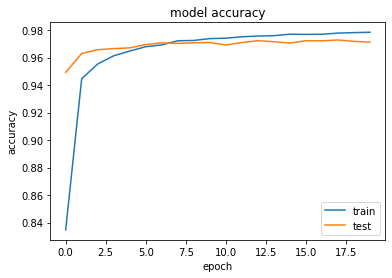

In [24]:
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('model accuracy')
plt.show()

In [ ]:
# summarize history for accuracy
## Problem 9

## Evaluating Loss Function Over Epochs
* __Problem 10__: Plot loss function as a function of epochs
* Use `history` for data to plot
* Make sure to include plot labels

In [ ]:
# summarize history for loss
## Problem 10

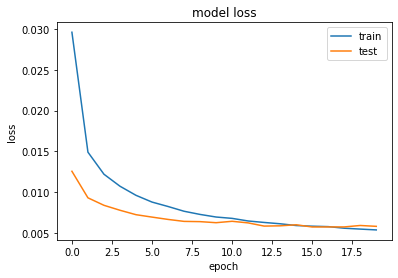

In [26]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('model loss')
plt.show()

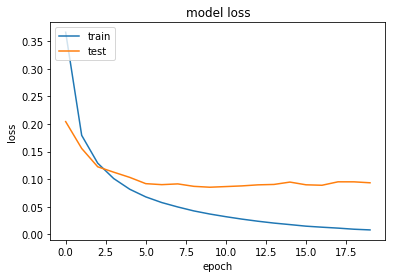

In [20]:
# summarize history for loss
## Problem 10

## Questions
1. How does your first NN compare with the literature: https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html
2. Is your model overfit or underfit? 
3. Does your model have high variance or low variance? 